In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ecgdetectors import Detectors
import sys
from MyEDFImports import load_data_one_file, get_edf_filenames, import_ecg, load_all_data, load_all_labels

In [2]:
all_data = load_all_data()
all_labels = load_all_labels()

Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CP229110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/WD224010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/TK221110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/VP214110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_

/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LM230010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/VC209100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LA216100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_

In [3]:
class ECG_20:
    def __init__(self, label, ecg, qrs):
        self.label = label,
        self.ecg = ecg,
        self.qrs = qrs
detectors = Detectors(500)

In [8]:
from MyEDFImports import remove_ecg_artifacts, three_stages_transform

In [11]:
print(len(all_data))
filtered_data, filter_labels = remove_ecg_artifacts(all_data, all_labels)
print(len(filtered_data))

19248
13604


In [12]:
# classes after filter

from collections import Counter
counted_filtered_labels = Counter(filter_labels)
print(counted_filtered_labels)
print(Counter(three_stages_transform(all_labels)))

Counter({1: 8856, 2: 2512, 0: 2236})
Counter({1: 12256, 0: 3519, 2: 3473})


In [ ]:
sum(counted_filtered_labels.values())

In [16]:
r_peaks = []
for i,x in enumerate(filtered_data):
    if i+1 % 100 == 0:
        print(i)
    p = detectors.engzee_detector(x)
    r_peaks.append(p)

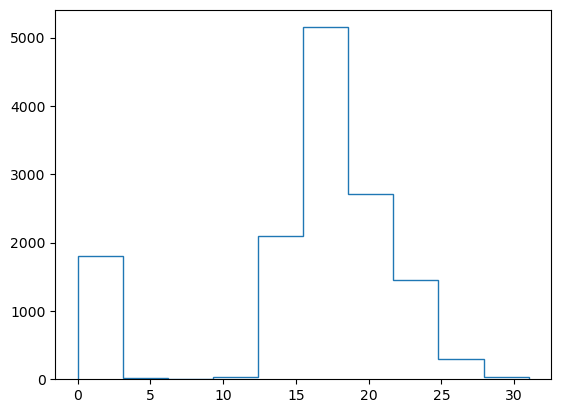

In [51]:
len_peaks = list(map(len,r_peaks))
counts, bins = np.histogram(len_peaks)
plt.stairs(counts, bins)

In [ ]:
edf_filenames = get_edf_filenames()
# choosing 3rd file from my edfs (CX230050.edf)
edf_fname = edf_filenames[2]
edf_data = import_ecg(edf_fname)


In [ ]:
# shortening the data
y = edf_data[0][0].T
x = edf_data[0][1]
start = 2*int(1e5)
length = 10000 #int(2**14)-3
y = y[start:start+length]
plt.plot(np.linspace(0,len(y)/500, len(y)),y)

In [ ]:
def plot_with_peaks(y, r_peaks, detector_name='nodetect', sampling_freq =500):
    # convert sample to nr to time
    r_ts = np.array(r_peaks) / sampling_freq
    # plotting
    plt.figure()
    t = np.linspace(0, len(y)/sampling_freq, len(y))
    plt.plot(t, y)
    plt.plot(r_ts, y[r_peaks], 'ro')
    plt.title(f"{detector_name}")
    plt.ylabel("ECG/mV")
    plt.xlabel("time/sec")
    plt.show()

In [ ]:
sampling_freq = int(edf_data.info["sfreq"])
detectors = Detectors(sampling_freq)

In [ ]:
temp = -1
selected_detector = temp

if selected_detector < 0:
    r_peaks = detectors.engzee_detector(all_data[1]+all_data[2])
else:
    r_peaks = detectors.get_detector_list()[selected_detector][1](y)
plot_with_peaks(y, r_peaks, temp)

r_peaks = detectors.swt_detector(y)
plot_with_peaks(y, r_peaks, temp)

In [ ]:
detector_names = [d[0] for d in detectors.get_detector_list()]
detector_names

In [ ]:
terrible_implementation = [d[0] for d in detectors.get_detector_list()]
for i in [0,3,4]:
    r_peaks = detectors.get_detector_list()[i][1](y.T)
    plot_with_peaks(y, r_peaks,detectors.get_detector_list()[i][0])


In [ ]:
for i in[0,3,4,5,6,7]:
    r_peaks = detectors.get_detector_list()[i][1](y)
    plot_with_peaks(y, r_peaks,detectors.get_detector_list()[i][0])

In [ ]:
r_peaks = detectors.hamilton_detector(y.tolist())
plot_with_peaks(y, r_peaks, temp)

In [ ]:
r_peaks = detectors.pan_tompkins_detector(y.T.tolist())
plot_with_peaks(y, r_peaks, temp)

In [ ]:
r_peaks

In [ ]:
qrs_250Hz = [
    -7.645702713191108752e-05, -7.106347966654649338e-05,
    -6.878923855084972288e-05, -7.376223955418129054e-05,
    -7.505940739257362907e-05, -7.359340063839676460e-05,
    -7.725458974933605244e-05, -7.940956033719324199e-05,
    -7.336339268636284648e-05, -7.456628708858126470e-05,
    -7.566086758609246300e-05, -7.349735939169964598e-05,
    -5.347989517407805986e-05, -2.576322276495676022e-05,
    9.591117385409254366e-06, 1.107073389637588853e-04,
    2.961803068709630482e-04, 4.753696858843639616e-04,
    6.228405036002417419e-04, 6.402785081510430380e-04,
    5.309927524565301229e-04, 3.431126173284082992e-04,
    1.764442858986930933e-05, -2.552819441634456661e-04,
    -3.073862523701238639e-04, -2.863456790664682282e-04,
    -2.518721694690555322e-04, -1.592148022053965631e-04,
    -9.424790245873809053e-05, -8.625069025906928586e-05,
    -1.135247594299841145e-04, -1.258153399732585710e-04,
    -1.193992999231953422e-04, -1.120866635229808870e-04,
    -1.134316910065725782e-04, -1.240209251568815188e-04,
    -1.259559380186601649e-04, -1.203450016337975629e-04,
    -1.110543536387444114e-04, -1.127605818197161149e-04,
    -1.170437211404296360e-04, -1.164120454904625621e-04,
    -1.114568819107143765e-04, -1.045314027530635311e-04
]

qrs_360Hz = [
    -2.012093043565478800e-01, -1.997445779689931422e-01,
    -1.933817485967479488e-01, -1.866300438888101043e-01,
    -1.900197917130422021e-01, -1.952489409119362584e-01,
    -2.077327660900527839e-01, -2.151062251971897488e-01,
    -2.286944266031576134e-01, -2.613282425072631088e-01,
    -3.109667077596850460e-01, -3.268329535815900355e-01,
    -3.207679356378619340e-01, -2.789804314489847115e-01,
    -2.002973727171682705e-01, -7.535273835744371596e-02,
    1.617855432133499249e-01, 4.830501280448596946e-01,
    8.046776909827563218e-01, 1.110971403512063693e+00,
    1.398619676476005047e+00, 1.646910048118821468e+00,
    1.795931835917133679e+00, 1.853719993357946683e+00,
    1.766209570127352135e+00, 1.507327784812496185e+00,
    1.102571692453119923e+00, 6.726173041414026388e-01,
    2.887363696891277476e-01, -3.219198191555563970e-02,
    -2.403461836981684585e-01, -3.541368003766390826e-01,
    -3.791183904479392131e-01, -3.276287305258123728e-01,
    -2.194183275717616899e-01, -1.273112649166615873e-01,
    -1.028728718059972597e-01, -1.320473557997807190e-01,
    -1.689497023598502679e-01, -1.903472688187088646e-01,
    -2.038415630949019508e-01, -1.977016005429313439e-01,
    -1.964550042183527689e-01, -1.830856541608651133e-01,
    -1.880574388507596506e-01, -2.047347501639194822e-01,
    -2.272093875641389704e-01, -2.399271748943634652e-01,
    -2.414975147279495027e-01, -2.491120256393957733e-01,
    -2.286999849340090596e-01
]
plt.plot(qrs_250Hz)


In [ ]:
qrs_500hz_linsp = np.linspace(-0.7,0.7,30)
qrs_500hz  = -qrs_500hz_linsp**2 + 0.18
t = np.linspace(0, len(qrs_500hz) / 500, len(qrs_500hz))
plt.plot(t, qrs_500hz)
plt.savefig('../Images/R_peaks_detection')

In [ ]:
t = np.linspace(0, len(qrs_360Hz) / sampling_freq, len(qrs_360Hz))
plt.plot(t,qrs_360Hz)

In [ ]:
yy = np.reshape(y, y.size)
print(y.shape)
yy.shape

In [ ]:
qrs_500hz_fft = np.fft.fft(qrs_500hz)
plt.plot(qrs_500hz_fft)
plt.show()

In [ ]:
np.sum(qrs_500hz)

In [ ]:
plt.plot(y[12000:15000])

In [ ]:
conv_500 = np.convolve(yy, qrs_500hz, 'same')
print(len(conv_500))
plt.plot(conv_500[14000:15000])
#plt.plot(np.sqrt(conv_500**2)[12000:15000])
plt.plot(y[14000:15000])

In [ ]:
from scipy import interpolate
qrs_500Hz_doubled = [qrs_250Hz[i//2] for i in range(2*len(qrs_250Hz))]
lin_old = np.linspace(1,len(qrs_250Hz),len(qrs_250Hz))
lin_new = np.linspace(1,len(qrs_250Hz), 2*len(qrs_250Hz))
qrs_500Hz_interpol = np.interp(lin_new, lin_old, np.array(qrs_250Hz))
plt.plot(qrs_500Hz_interpol)

In [ ]:
np.savetxt('qrs_500Hz_interpol', qrs_500Hz_interpol)

In [ ]:
r_peaks = detectors.matched_filter_detector(y, 'qrs_500Hz_interpol')
plot_with_peaks(y, r_peaks, temp)